In [215]:
import numpy as np
import pandas as pd
from source.moreka import AxonData
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


In [216]:
data = AxonData(dirname='../data')
df = data[3].iloc[::50, :]

# Calculate the moving average with a window size of 10
window_size = 10
df['smoothed_signal'] = df['signal'].rolling(window=window_size, min_periods=1).mean()

C:\Users\mrkaz\AppData\Local\Temp\ipykernel_9224\764116965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_signal'] = df['signal'].rolling(window=window_size, min_periods=1).mean()


In [217]:
# Calculate the absolute differences between consecutive signal values
df['distance'] = abs(df['smoothed_signal'].diff().fillna(0))

# Calculate the cumulative sum in the 'time' column
df['distance'] = df['distance'].cumsum()

# Display the modified DataFrame
print(df)


          time    signal  smoothed_signal    distance
0        0.000  1.203003         1.203003    0.000000
50       0.005  1.449585         1.326294    0.123291
100      0.010  1.259155         1.303914    0.145671
150      0.015  1.163025         1.268692    0.180893
200      0.020  0.617981         1.138550    0.311035
...        ...       ...              ...         ...
599750  59.975  0.534363         0.536835  306.311990
599800  59.980  0.342712         0.518860  306.329965
599850  59.985  0.521851         0.513184  306.335641
599900  59.990  0.436096         0.502808  306.346017
599950  59.995  0.371399         0.484039  306.364786

[12000 rows x 4 columns]


C:\Users\mrkaz\AppData\Local\Temp\ipykernel_9224\1882045407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = abs(df['smoothed_signal'].diff().fillna(0))
C:\Users\mrkaz\AppData\Local\Temp\ipykernel_9224\1882045407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df['distance'].cumsum()


<Axes: xlabel='distance', ylabel='smoothed_signal'>

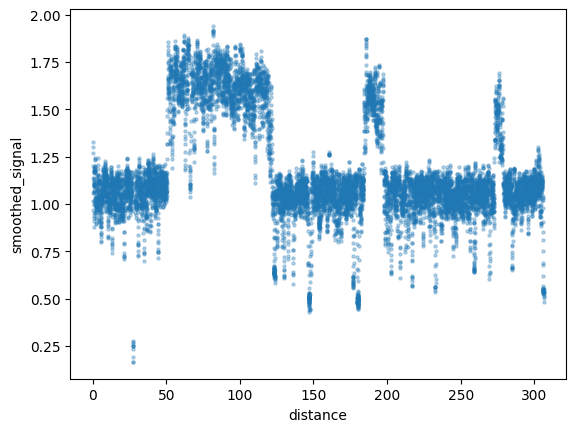

In [218]:
# plot df
df.plot(x='distance', y='smoothed_signal', kind='scatter', alpha=0.3, s=5)

In [219]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [220]:
# # Compute the distance matrix
# distance_matrix = squareform(pdist(df[['distance', 'smoothed_signal']]))
#
# # Sort the distances to visualize them
# sorted_distances = np.sort(distance_matrix, axis=None)


In [221]:
# # Plot the sorted distances
# plt.plot(sorted_distances)
# plt.xlabel('Index')
# plt.ylabel('Distance')
# plt.title('Sorted Distances')
# plt.show()


In [222]:
# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=5)  # You can adjust eps and min_samples based on your data
labels = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
df['cluster'] = labels

df

C:\Users\mrkaz\AppData\Local\Temp\ipykernel_9224\1729826158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


,time,signal,smoothed_signal,distance,cluster
0,0.000,1.203003,1.203003,0.000000,-1
50,0.005,1.449585,1.326294,0.123291,-1
100,0.010,1.259155,1.303914,0.145671,-1
150,0.015,1.163025,1.268692,0.180893,-1
200,0.020,0.617981,1.138550,0.311035,-1
...,...,...,...,...,...
599750,59.975,0.534363,0.536835,306.311990,146
599800,59.980,0.342712,0.518860,306.329965,-1
599850,59.985,0.521851,0.513184,306.335641,146
599900,59.990,0.436096,0.502808,306.346017,-1


In [223]:
# # Calculate cluster centroids
# cluster_centroids = df.groupby('cluster')[['distance', 'smoothed_signal']].mean()
#
# # Calculate pairwise distances between cluster centroids
# distances = euclidean_distances(cluster_centroids)
#
# # Define a threshold for merging clusters
# merge_threshold = 1.0  # Adjust as needed
#
# # Merge clusters that are closer than the threshold
# merged_clusters = []
# merged_labels = np.zeros(len(cluster_centroids), dtype=int)
#
# for i in range(len(cluster_centroids)):
#     if merged_labels[i] == 0:
#         merged_cluster = [i]
#         for j in range(i + 1, len(cluster_centroids)):
#             if distances[i, j] < merge_threshold:
#                 merged_cluster.append(j)
#                 merged_labels[j] = 1
#         merged_clusters.append(merged_cluster)
#
# # Assign new cluster labels based on merged clusters
# for new_cluster_label, merged_cluster in enumerate(merged_clusters):
#     for original_cluster_label in merged_cluster:
#         df.loc[df['cluster'] == original_cluster_label, 'cluster'] = new_cluster_label
#
# df

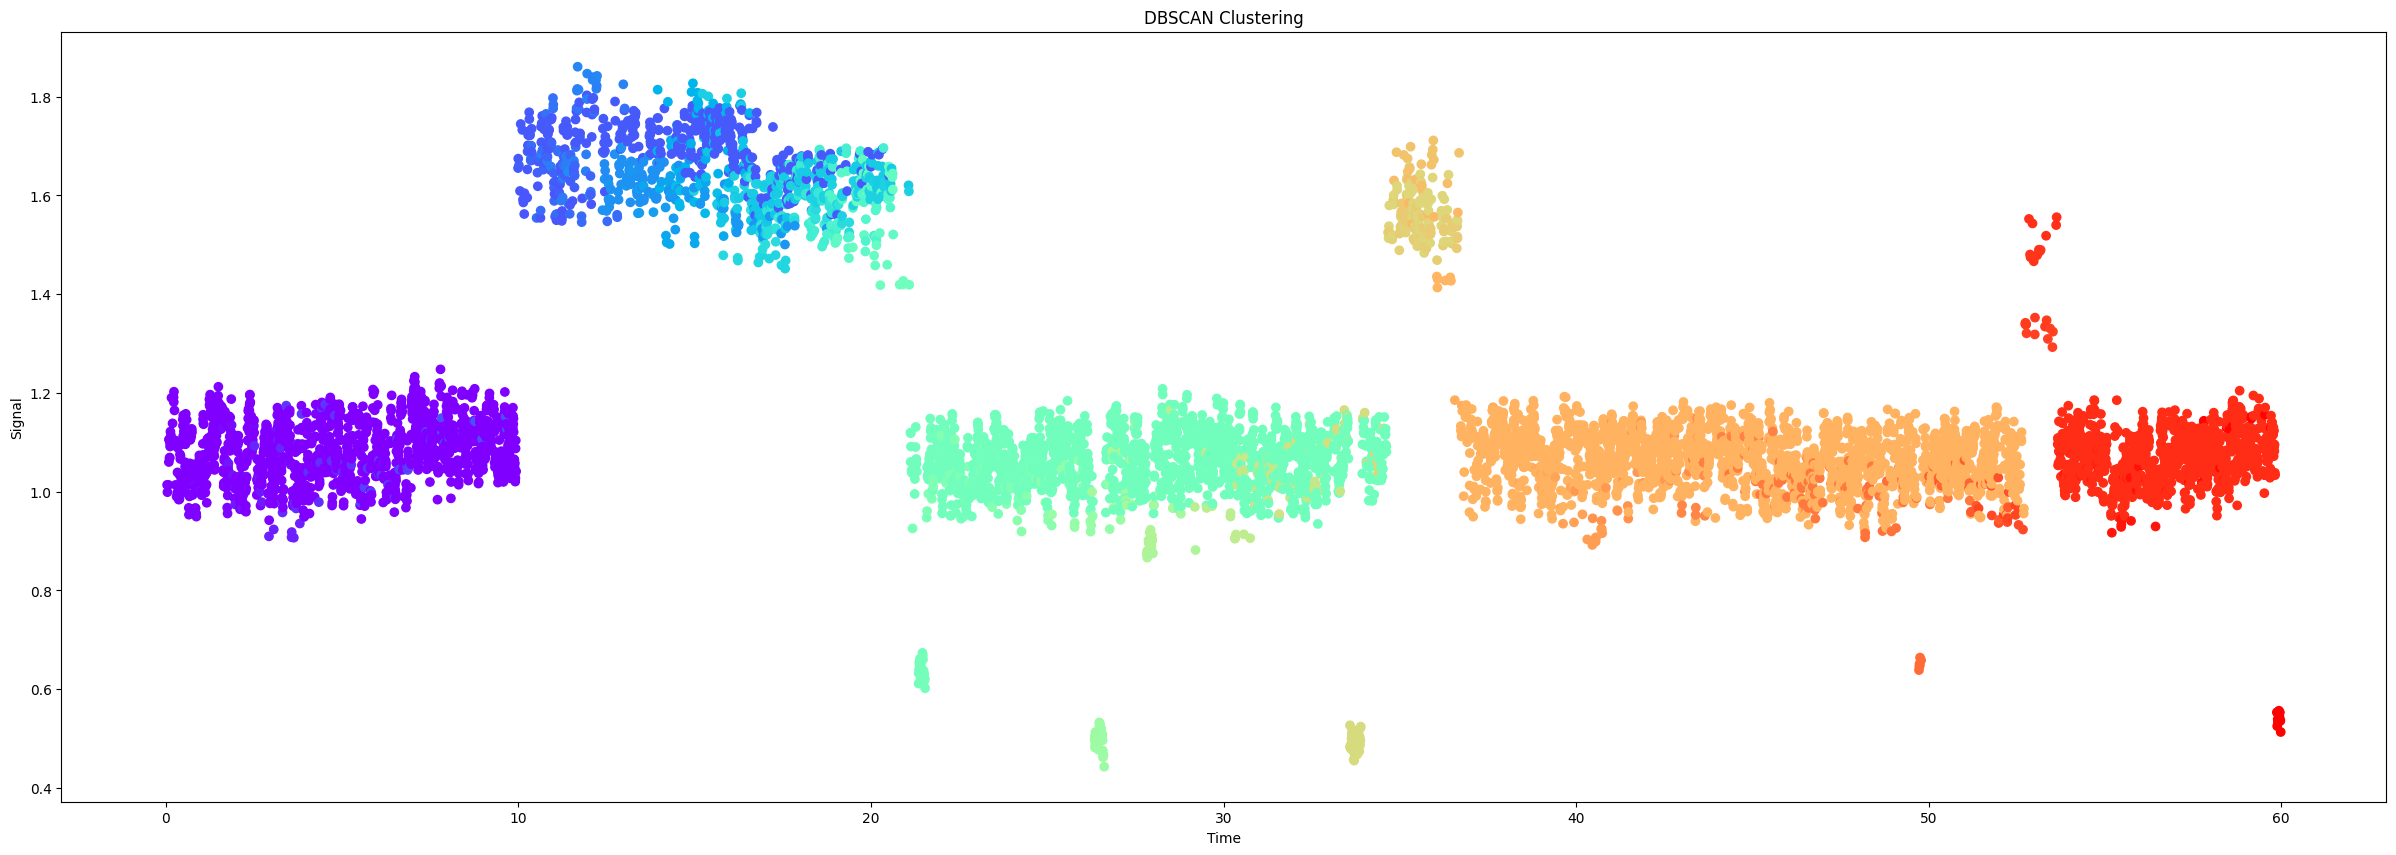

In [224]:
# Plot the clusters

# Filter out points with cluster -1
filtered_df = df[df['cluster'] != -1]

plt.figure(figsize=(30, 10))
plt.scatter(filtered_df['time'], filtered_df['smoothed_signal'], c=filtered_df['cluster'], cmap='rainbow', alpha=1)

# Add cluster labels next to each point for the first 100 points
# for index, row in filtered_df.iloc[0:500].iterrows():
#     plt.text(row['time'], row['smoothed_signal'], str(int(row['cluster'])), color='black')


plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('DBSCAN Clustering')
# plt.xlim(0, 10)
plt.show()
